<a href="https://colab.research.google.com/github/Vibhugupta10616/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/exercise-08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

<div class="alert-block alert-info alert"> Hello! If this is your first assignment please read the following instructions:

Read the questions carefully and code what is asked in the respective code block whenever you see a ``` #TODO: YOUR CODE HERE. ```
It is important to do the Coding tasks IN ORDER, as the majority of coding blocks are dependent on the
previous coding blocks in the notebook.
Please also note that there is a **raise NotImplementedError()** for each task or function you have to
implement, so don't forget to remove it before testing your code, otherwise you will always get a "not
implemented" error.

You need to install required python packages before executing your codes. Simply run the block below to install it in the Colab environment of your Google account. Rerun the block when you are not sure they are properly installed.

You need to manually upload the data used in this exercise to Colab. Just create a folder 'data' and paste the respective files into this folder. Otherwise, you will get a 'File not found' error. You can find the data in StudOn.

Aside from coding blocks, there are also testing blocks to check whether your implementations
are correct, you can run them but do not change the code inside of them.
The tests are determined via the ASSERT STATEMENTS that you see on the testing blocks, which can help you
out during the coding of the exercises. If you pass all the visible asserts, you will probably get a good
grade on the exercise, just remember that there are also hidden tests, so hardcoding the assert statements
won't help you.

REMEMBER: This Colab notebook DOES NOT HAVE AN AUTOSAVE FUNCTION, so whenever you want to close it, please
remember to save it by clicking on the "file" tab in the upper left corner of the page, followed by
clicking on the "Save a copy to GitHub" button and selecting your corresponding GitHub repository:
"madlab-biosig/exercise-x-YourGitHubUsername"

Before you save the final version of your assignment, please make sure everything runs as expected.
First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all
cells** (in the menubar, select Cell$\rightarrow$Run All).
</div>

In [2]:
!pip install pandas scipy==1.10 h5py==3.9.0 seaborn==0.13.2 scikit-learn==1.3.0 ipywidgets ipympl

In [3]:
from ipywidgets import Widget
Widget.close_all()

### BioSig Exercises WS 24/25
---

# Exercise 08

In [4]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
%matplotlib widget

# If you are using Jupyter Notebook
# %matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
from scipy import signal

In [6]:
def pole_zero_plot(b, a, ax=None):
    from matplotlib import patches

    zeros, poles, _ = signal.tf2zpk(b, a)
    print("zeros: ", zeros, "\n poles:", poles)

    # To visualize pole-zero plane: plot unit circle and x,y axis
    if not ax:
        plt.figure()
        ax = plt.subplot(1, 1, 1)

    # Check for duplicates poles or zeros
    import collections
    multi_pole = ((k, v) for k, v in collections.Counter(poles).items() if v > 1)
    multi_zeros = ((k, v) for k, v in collections.Counter(zeros).items() if v > 1)

    # plot circle
    circ = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)

    #plot axis
    ax.axhline(y=0, color='0.9')
    ax.axvline(x=0, color='0.9')

    # plot poles and zeros
    ax.plot(zeros.real, zeros.imag, 'o', markersize=9, alpha=0.5)
    ax.plot(poles.real, poles.imag, 'x', markersize=9, alpha=0.5)

    # Add label for duplicates
    import itertools
    for pos, c in itertools.chain(multi_pole, multi_zeros):
        ax.text(pos.real, pos.imag, c, fontsize=12)

    ax.axis('scaled')
    ax.axis([-1.5, 1.5, -1.5, 1.5])

    ax.set_xlabel('Re')
    ax.set_ylabel('Im')

def plot_freq_response(b, a, sampling_rate=None, log_y=True,create_new_fig=True, label=None):
    """Plot the freq response of a window.

    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        log_y: If True the y=axis will be in base 10 log.
        create_new_fig: If True a new figure is created for the plot
    """
    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()
    # Calculate the frequency response using scipy.signal.freqz
    # Use the fs parameter to calculate the output relative to the sampling rate
    w, h = signal.freqz(b, a, fs=sampling_rate)
    if log_y is True:
        h_plot = 20 * np.log10(abs(h))
        ax1.set_ylabel('Amplification [dB]', color='b')
    else:
        h_plot = abs(h)
        ax1.set_ylabel('Amplification [no unit]', color='b')

    ax1.plot(w, h_plot, 'b', label=label)
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g', label=label)
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')

## Ex 8.1: Butterworth Low Pass Filter

The Butterworth filter is one of the most important filters because of its flat passband.

a) Use the function `scipy.signal.butter` to design a digital filter butterworth lowpass filter of order 20, with cut off frequency 25.
Plot the magnitude response and the Pole Zero Plot for filters of orders given below.

b) Change the cutoff frequency. Explain how the poles and zeros move in the z-plane depending on the filter order and the cut-off frequency.

c) Apply the filters of different order to an example signal and describe the differences between the outputs

YOUR ANSWER HERE:

**Cutoff Frequency:** Increasing the cutoff frequency moves the poles closer to the unit circle in the z-plane and the zeros towards the origin, resulting in a wider passband. Decreasing the cutoff frequency moves the poles away from the unit circle and the zeros towards the periphery of the unit circle, narrowing the passband.

**Filter Order:** Increasing the filter order adds more poles and zeros to the z-plane. The poles tend to cluster closer to the unit circle, resulting in a sharper transition band between the passband and stopband.


Observe that higher-order filters provide more aggressive smoothing, effectively removing higher-frequency components from the signal. However, excessive filtering can distort the signal's features, so it's crucial to choose an appropriate filter order based on the specific application and desired outcome.

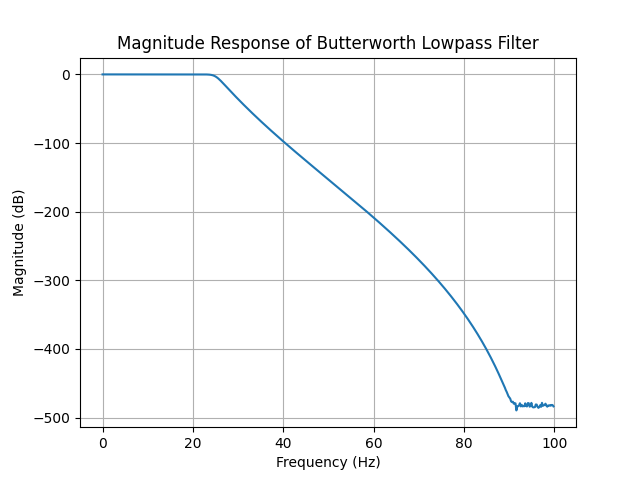

In [7]:
sampling_rate = 200

# Filter order
ns = 20
# Cutoff
fc = 25

# Calculate the magnitude responses for the filter orders provided above. PLOTS ARE NOT GRADED!!
# Design lowpass butterworth filter of order 20, fc=25
# YOUR CODE HERE

b, a = signal.butter(ns, fc, btype='lowpass', fs=sampling_rate)

# Calculate the frequency response
w, h = signal.freqz(b, a, fs=sampling_rate)

# Plot the magnitude response
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)))  # Convert to dB
plt.title('Magnitude Response of Butterworth Lowpass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

# raise NotImplementedError()

In [8]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert (21 ==len(b)), "Your Filter Order is wrong"
assert (21 ==len(a)), "Your Filter Order is wrong"


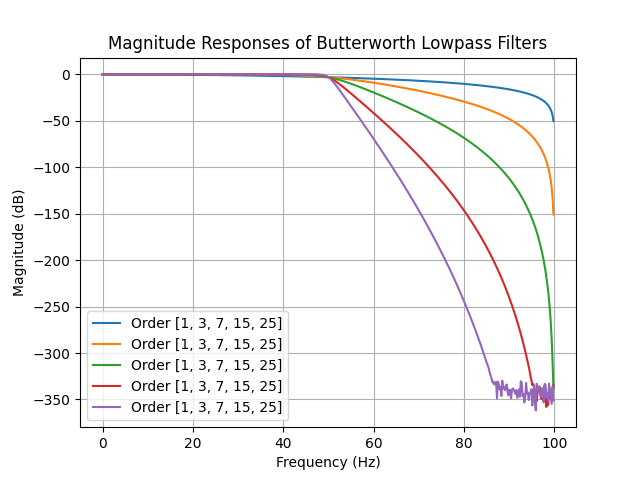

In [9]:
sampling_rate = 200

# Filter orders
ns = [1, 3, 7, 15, 25]
# Cutoff
fc = 50  # Try different values (e.g 100 Hz, 50 Hz and 75 Hz)

# Plot the magnitude responses for the filter orders provided above. PLOTS ARE NOT GRADED!!
# YOUR CODE HERE


plt.figure()  # Create a new figure for the plots

for order in ns:
    # Design the Butterworth filter for the current order
    b, a = signal.butter(order, fc, btype='lowpass', fs=sampling_rate)

    # Calculate the frequency response
    w, h = signal.freqz(b, a, fs=sampling_rate)

    # Plot the magnitude response
    plt.plot(w, 20 * np.log10(abs(h)), label=f"Order {ns}")  # Convert to dB and label

plt.title("Magnitude Responses of Butterworth Lowpass Filters")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.legend()  # Show legend to distinguish different orders
plt.show()


# raise NotImplementedError()

zeros:  [-1.] 
 poles: [5.55111512e-17]


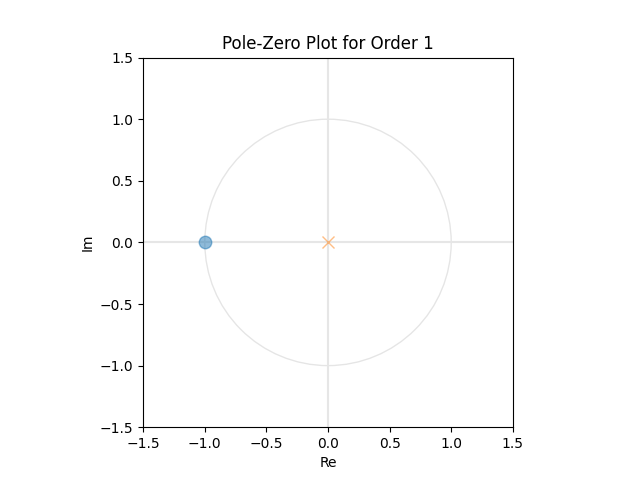

zeros:  [-0.99999671+5.69684689e-06j -0.99999671-5.69684689e-06j
 -1.00000658+0.00000000e+00j] 
 poles: [1.11022302e-16+0.57735027j 1.11022302e-16-0.57735027j
 5.55111512e-17+0.j        ]


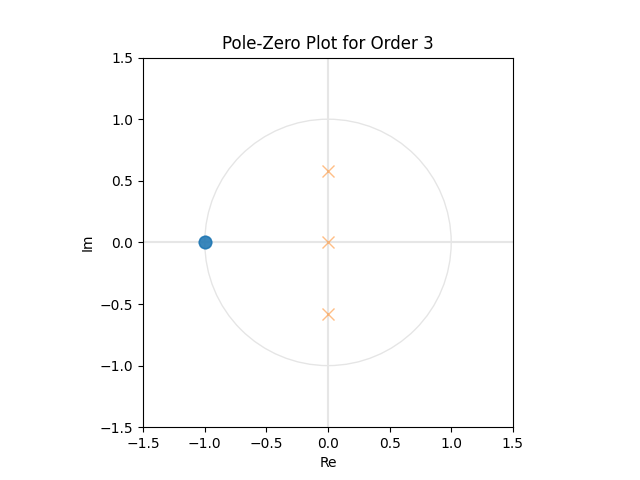

zeros:  [-1.00674577+0.00330183j -1.00674577-0.00330183j -1.00154726+0.00727405j
 -1.00154726-0.00727405j -0.99535345+0.00568063j -0.99535345-0.00568063j
 -0.99270705+0.j        ] 
 poles: [5.55111512e-17+0.79747339j 5.55111512e-17-0.79747339j
 5.55111512e-17+0.48157462j 5.55111512e-17-0.48157462j
 8.32667268e-17+0.22824347j 8.32667268e-17-0.22824347j
 5.55111512e-17+0.j        ]


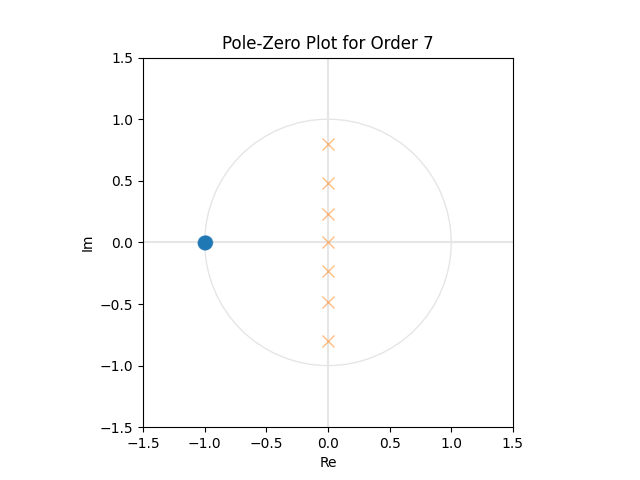

zeros:  [-1.19098585+0.04467648j -1.19098585-0.04467648j -1.14926116+0.12207607j
 -1.14926116-0.12207607j -1.07968047+0.16915975j -1.07968047-0.16915975j
 -1.0018928 +0.17991998j -1.0018928 -0.17991998j -0.93224186+0.15925423j
 -0.93224186-0.15925423j -0.87976741+0.11675135j -0.87976741-0.11675135j
 -0.84770432+0.06136808j -0.84770432-0.06136808j -0.83693228+0.j        ] 
 poles: [2.22044605e-16+0.90040404j 2.22044605e-16-0.90040404j
 1.11022302e-16+0.72654253j 1.11022302e-16-0.72654253j
 1.11022302e-16+0.57735027j 1.11022302e-16-0.57735027j
 1.11022302e-16+0.44522869j 1.11022302e-16-0.44522869j
 5.55111512e-17+0.3249197j  5.55111512e-17-0.3249197j
 9.02056208e-17+0.21255656j 9.02056208e-17-0.21255656j
 3.64291930e-17+0.10510424j 3.64291930e-17-0.10510424j
 5.55111512e-17+0.j        ]


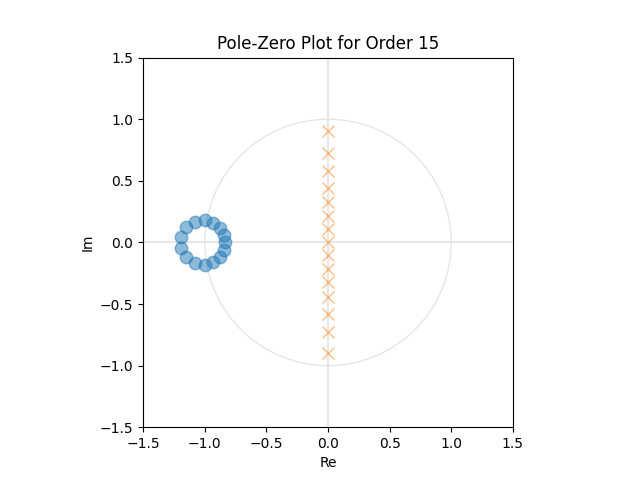

zeros:  [-1.59441543+0.j         -1.55640178+0.18714991j -1.55640178-0.18714991j
 -1.45322635+0.33812435j -1.45322635-0.33812435j -1.31444844+0.42843572j
 -1.31444844-0.42843572j -1.18428842+0.46024838j -1.18428842-0.46024838j
 -1.06955014+0.47805456j -1.06955014-0.47805456j -0.94453678+0.46744102j
 -0.94453678-0.46744102j -0.83468871+0.41971808j -0.83468871-0.41971808j
 -0.75103276+0.35082641j -0.75103276-0.35082641j -0.69238477+0.27344536j
 -0.69238477-0.27344536j -0.65368966+0.19455075j -0.65368966-0.19455075j
 -0.6299975 +0.11640307j -0.6299975 -0.11640307j -0.61854697+0.03877437j
 -0.61854697-0.03877437j] 
 poles: [1.11022302e-16+0.93906251j 1.11022302e-16-0.93906251j
 1.11022302e-16+0.82727195j 1.11022302e-16-0.82727195j
 1.11022303e-16+0.72654253j 1.11022303e-16-0.72654253j
 5.55111511e-17+0.6346193j  5.55111511e-17-0.6346193j
 1.66533454e-16+0.54975465j 1.66533454e-16-0.54975465j
 8.32667267e-17+0.47056428j 8.32667267e-17-0.47056428j
 5.55111513e-17+0.39592801j 5.55111513e-17-0

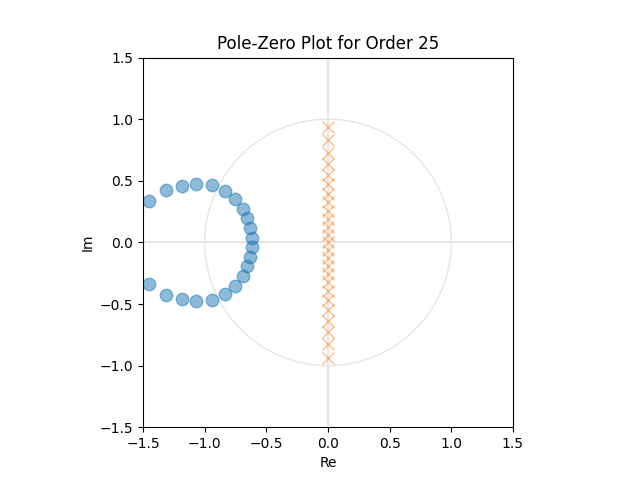

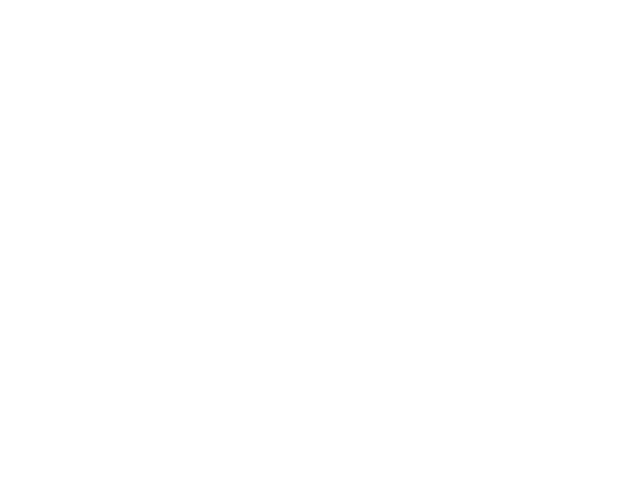

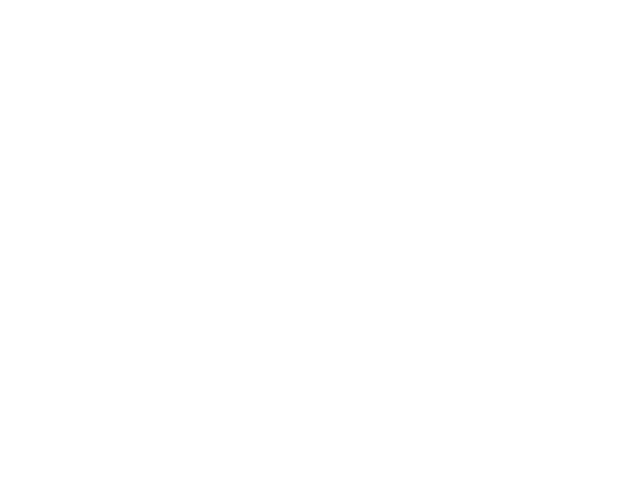

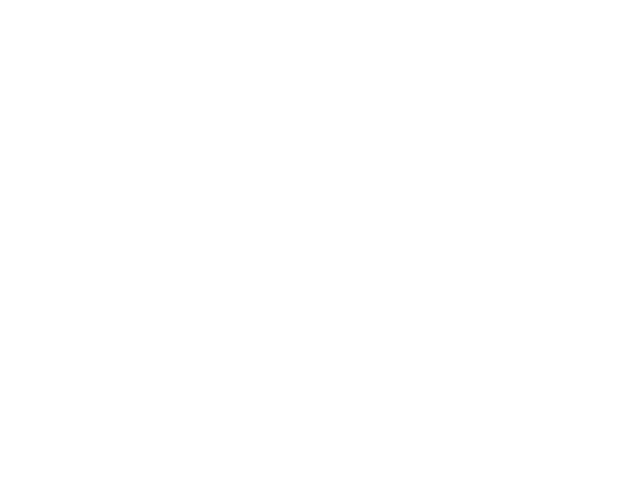

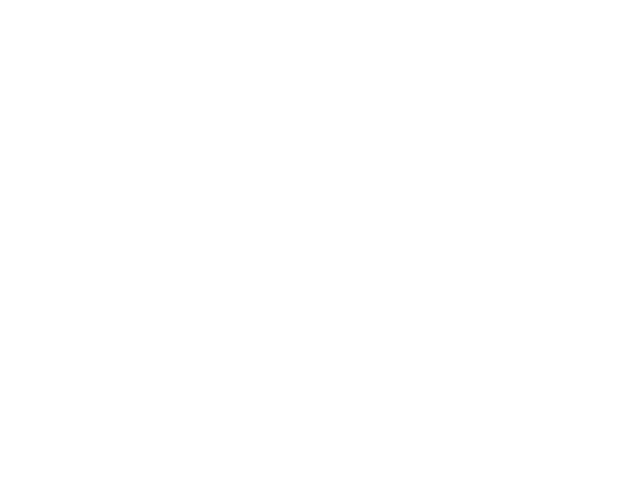

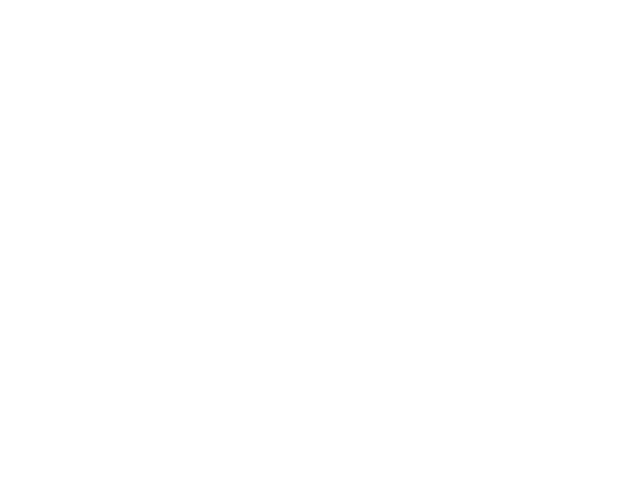

In [10]:
# Plot the Pole-Zero Plots for each filter order
# YOUR CODE HERE

for order in ns:
    # Design the Butterworth filter for the current order
    b, a = signal.butter(order, fc, btype='lowpass', fs=sampling_rate)

    # Plot the Pole-Zero plot
    plt.figure()  # Create a new figure for each plot
    pole_zero_plot(b, a)
    plt.title(f"Pole-Zero Plot for Order {order}")
    plt.show()


# raise NotImplementedError()

<ipython-input-11-ccf83b614868>:3: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  test_ecg = electrocardiogram()[65520:67000]


Text(0.5, 0, 'time [s]')

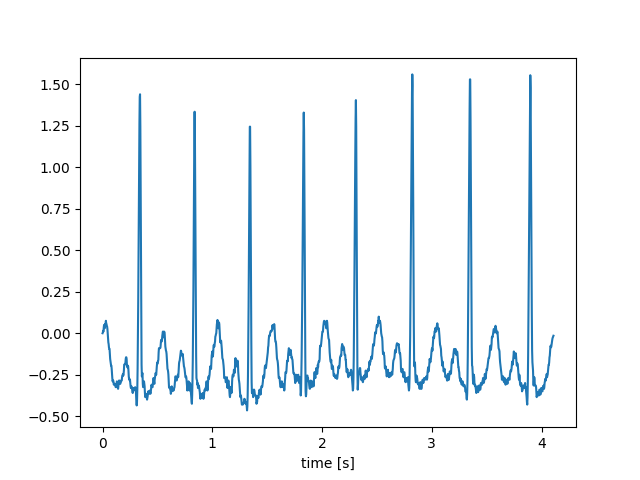

In [11]:
from scipy.misc import electrocardiogram

test_ecg = electrocardiogram()[65520:67000]
test_sampling_rate = 360.
x = np.arange(0, len(test_ecg)) / test_sampling_rate
plt.figure()
plt.plot(x, test_ecg)
plt.xlabel('time [s]')

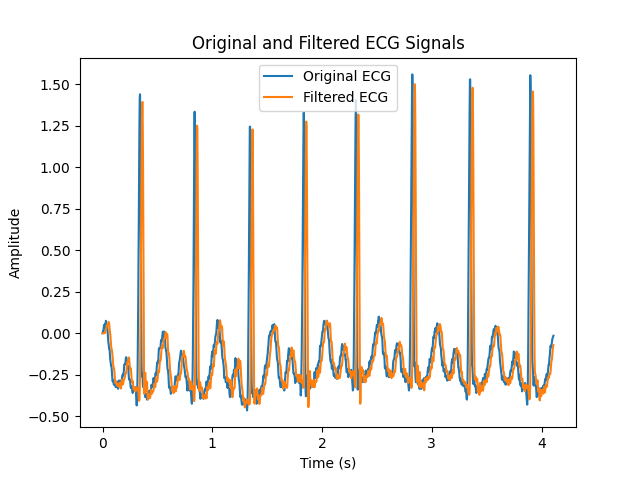

In [12]:
# Apply the filter to the test signal
# YOUR CODE HERE

filtered_ecg = signal.lfilter(b, a, test_ecg)

# Plot the original and filtered signals
plt.figure()
plt.plot(x, test_ecg, label='Original ECG')
plt.plot(x, filtered_ecg, label='Filtered ECG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Filtered ECG Signals')
plt.legend()
plt.show()


# raise NotImplementedError()

In [13]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert len(filtered_ecg==1480), "The length of the filtered signal is incorrect"


## Exercise 8.2 IIR vs FIR

a) Given the two transfer functions below: Which one belongs to and IIR and which belongs to a FIR filter? Explain!

$$
y[n] + 2y[n-1] = x[n] - x[n-1]
$$

$$
y[n]= x[n] + 2x[n-1]
$$

b) Both, a Butterworth filter and a Moving Average filter can have low-pass characteristics. Design one filter of each group with the filter order 10.(moving average with window size 10). Choose a cutoff for the butterworth filter to match the 3 db cutoff of the moving average(round to nearest integer in Hz).
Plot the phase and magnitude response. Compare the output. Which filter would you prefer?

c) Increase the filter order of both filters. At some point the IIR filter will start behaving “strangely”. Explain what happens.

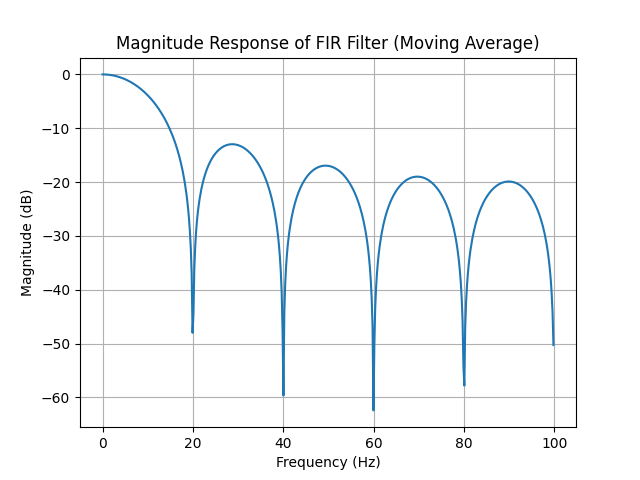

Selected cutoff frequency (fc): 10 Hz


In [36]:
n=10
# Implement a FIR filter and plot its magnitude response. PLOTS ARE NOT GRADED!!
# Select the fc from the FIR magnitude Response  plot

# YOUR CODE HERE

# Define the filter order (window size)
n = 10

# Create a simple moving average filter (FIR)
fir_b = np.ones(n) / n  # Filter coefficients
fir_a = [1]  # Denominator coefficients (for FIR, it's just 1)

# Calculate the frequency response
w, h = signal.freqz(fir_b, fir_a, fs=200)  # Assume a sampling rate of 200 Hz

# Plot the magnitude response
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Magnitude Response of FIR Filter (Moving Average)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

f_c = 10

print("Selected cutoff frequency (fc):", f_c, "Hz")

# raise NotImplementedError()

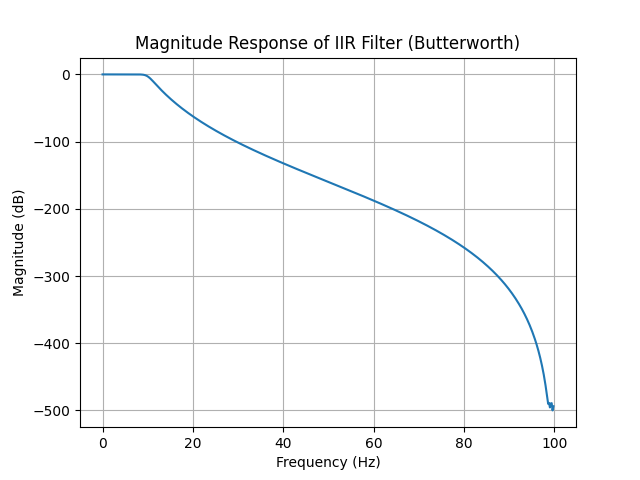

In [37]:
# Implement a IIR filter and plot its magnitude response. PLOTS ARE NOT GRADED!!
# YOUR CODE HERE

# Define the filter order
n = 10

# Define the cutoff frequency (use the f_c value from the previous FIR filter)
fc = 10

# Design the Butterworth filter
iir_b, iir_a = signal.butter(n, fc, btype='lowpass', fs=200)

# Calculate the frequency response
w, h = signal.freqz(iir_b, iir_a, fs=200)

# Plot the magnitude response
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Magnitude Response of IIR Filter (Butterworth)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

# raise NotImplementedError()

In [38]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert (f_c==9), "Your selected IIR Frequency is wrong"
assert (11==len(iir_b)), "Your IIR filter order is incorrect"
assert (11==len(iir_a)), "Your IIR filter order is incorrect"
assert (10==len(fir_b)), "Your FIR filter order is incorrect"
assert (10==len(fir_a)), "Your FIR filter order is incorrect"


AssertionError: Your selected IIR Frequency is wrong

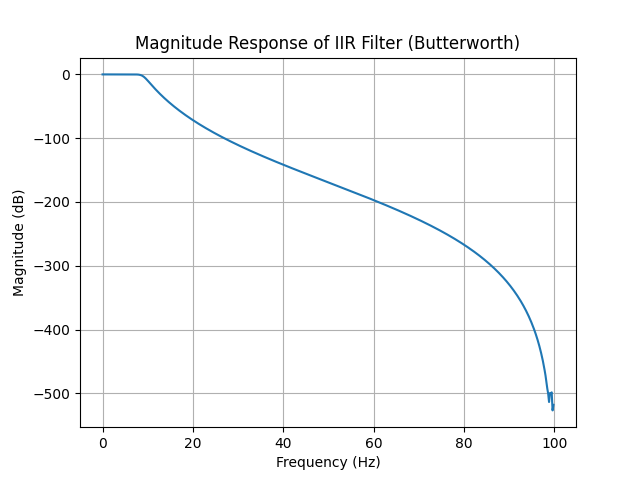

AssertionError: Your selected IIR Frequency is wrong

In [41]:
# Perform the same analysis as before, but with higher filter orders
# Implement a IIR filter and plot its magnitude response


# YOUR CODE HERE
# Define the filter order
n = 10  # Choose the desired filter order

# Define the cutoff frequency
fc = 9  # You need to specify a suitable cutoff frequency

# Design the Butterworth filter
iir_b, iir_a = signal.butter(n, fc, btype='lowpass', fs=200)  # Assume a sampling rate of 200 Hz

# Calculate the frequency response
w, h = signal.freqz(iir_b, iir_a, fs=200)

# Plot the magnitude response
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)))  # Plot in decibels (dB)
plt.title('Magnitude Response of IIR Filter (Butterworth)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()


# raise NotImplementedError()

assert (f_c==9), "Your selected IIR Frequency is wrong"
assert (11<=len(iir_b)), "Your IIR filter order is incorrect"
assert (11<=len(iir_a)), "Your IIR filter order is incorrect"
assert (10<=len(fir_b)), "Your FIR filter order is incorrect"
assert (10<=len(fir_a)), "Your FIR filter order is incorrect"

In [ ]:
# Investigate strange behaviour of the IIR filter
# YOUR CODE HERE


# Test signal
fs = 200  # Sampling rate
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*10*t)  # Example sine wave

# Vary filter order
for n in [10, 20, 30, 40]:
    # Design Butterworth filter
    b, a = signal.butter

# raise NotImplementedError()